In [1]:
import os
from typing import List, Dict, Tuple

import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from tqdm.notebook import tqdm
tqdm.pandas()
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud

/home/eyal/.local/lib/python3.8/site-packages/tqdm/std.py:666: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [3]:
stop_words = set(nltk.corpus.stopwords.words('english')) 

In [4]:
class Article:
    """
    Article class to represent a single article, contains the article text
    and more information on the location of the article.
    """
    def __init__(self, text: str, city: str, cb: str, neighborhood: str):
        """
        Inits the class with the article text and locations.
        """
        self.text = text
        self.city = city
        self.cb = cb
        self.neighborhood = neighborhood
        
    def preprocess(self, preprocess_func):
        """
        Preprocess the article text using the preprocess func the was given.
        
        Parameters
        ----------
        preprocess_func: Callable[[str], [str]]
            The preprocess function that transforms the article text.
        
        Returns
        -------
        new_text: str
            Article text after getting transformed by the preprocess_func.
        """
        
        new_text = preprocess_func(self.text)
        return new_text

In [5]:
# def load_articles(path: str) -> Dict[str, List[Article]]
def load_articles(path: str) -> pd.DataFrame:
    
    df = pd.DataFrame()
    
    cities = os.listdir(path)
    for city in (t_city := tqdm(cities, leave=False)):
        t_city.set_description(f'{city}')
        
        city_path = os.path.join(path, city)
        cbs = os.listdir(city_path)
        
        for cb in (t_cb := tqdm(cbs, leave=False)):
            t_cb.set_description(f'{cb}')
            
            cb_path = os.path.join(city_path, cb)
            neighborhoods = os.listdir(cb_path)
            
            for neighborhood in (t_neighborhood := tqdm(neighborhoods, leave=False)):
                t_neighborhood.set_description(f'{neighborhood}')
                
                neighborhood_path = os.path.join(cb_path, neighborhood)
                articles = os.listdir(neighborhood_path)
                
                for article in articles:
                    article_path = os.path.join(neighborhood_path, article)
                    with open (article_path, 'r') as f:
                        article = f.read()
                    series = pd.Series({'city': city, 'cb': cb, 'neighborhood': neighborhood, 'articles': article})
                    df = df.append(series, ignore_index=True)
                    
    return df

In [6]:
df = load_articles('../data/articles')

In [7]:
stop_words |= set(df.cb.unique()) | set(df.city.unique()) | set(df.neighborhood.unique())

In [8]:
df.head()

,articles,cb,city,neighborhood
0,The New York City Council was supposed to hold...,Bronx,New York,Kingsbridge
1,"Marco Wylie (center), 29, a transgender man an...",Bronx,New York,Kingsbridge
2,"Ann Pettway is charged with kidnapping a baby,...",Bronx,New York,Kingsbridge
3,The long-empty Kingsbridge Armory in the Bronx...,Bronx,New York,Kingsbridge
4,On many evenings in Flushing Meadows-Corona Pa...,Bronx,New York,Kingsbridge


In [9]:
df.shape

(86867, 4)

In [11]:
df['articles'] = df['articles'].progress_apply(lambda article: ' '.join([w for w in article.split(' ') if not w in stop_words]))

In [16]:
def generate_wordcloud(df: pd.DataFrame, column: str, value: str) -> None:

    filtered_df = df[df[column] == value]
    text = " ".join(article for article in filtered_df.articles)
    wordcloud = WordCloud(width=800, height=600, stopwords=stop_words, background_color="black").generate(text)
    
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'{column}: {value}')
    plt.axis("off")
    plt.show()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



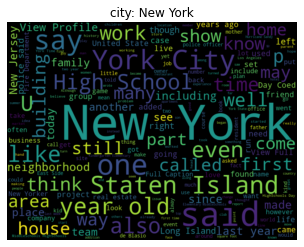

In [13]:
generate_wordcloud(df, 'city', 'New York')

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



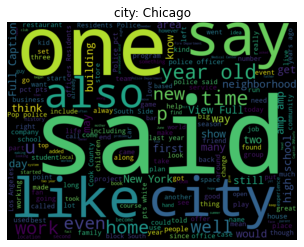

In [14]:
generate_wordcloud(df, 'city', 'Chicago')

### Chicago Wordclouds

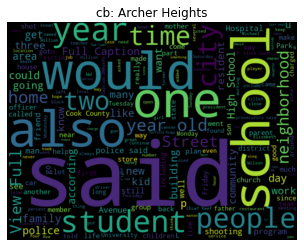

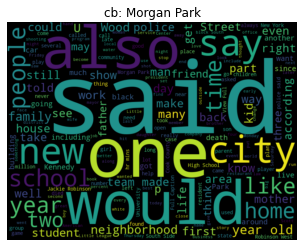

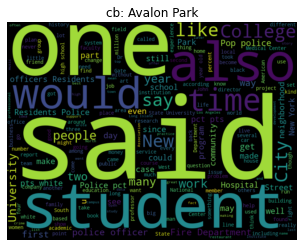

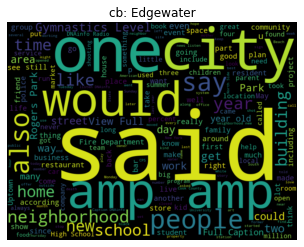

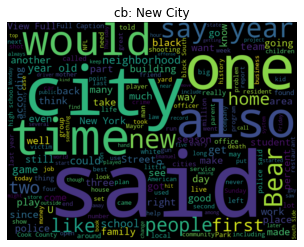

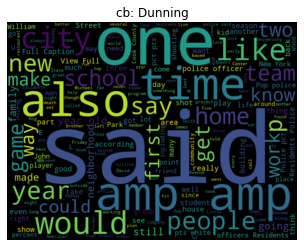

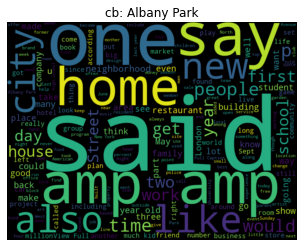

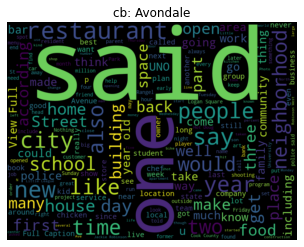

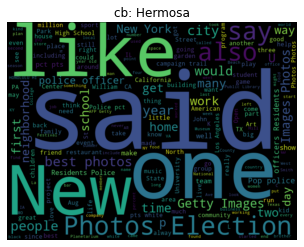

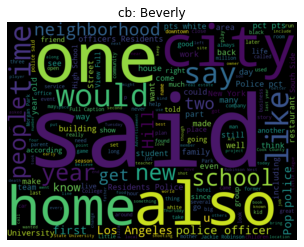

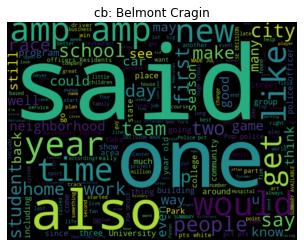

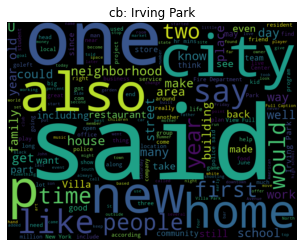

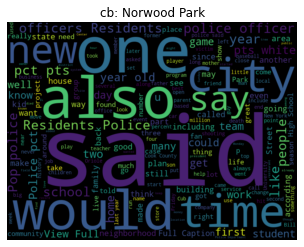

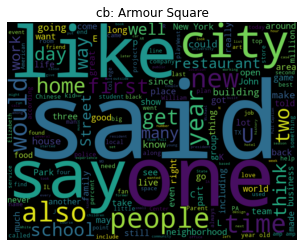

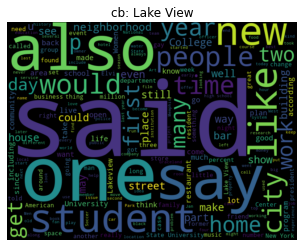

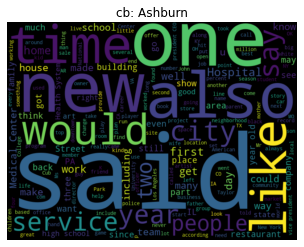

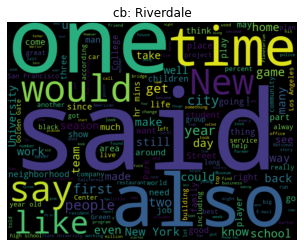

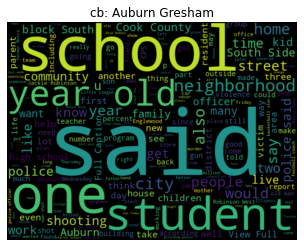

In [17]:
chicago_df = df[df.city == 'Chicago']
for cb in chicago_df.cb.unique():
    generate_wordcloud(df, 'cb', cb)

### New York Wordclouds

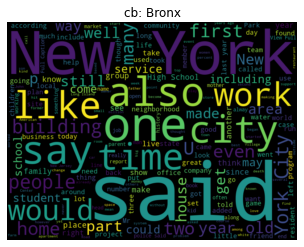

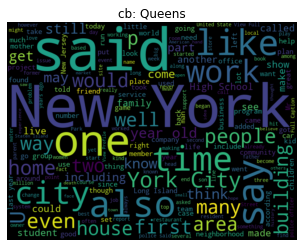

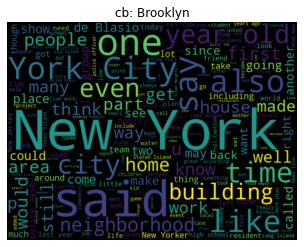

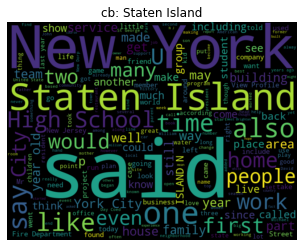

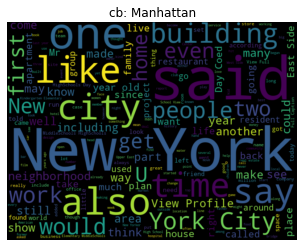

In [18]:
newyork_df = df[df.city == 'New York']
for cb in newyork_df.cb.unique():
    generate_wordcloud(df, 'cb', cb)